In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import h5py
import pandas as pd
import numpy as np
import copy
import os
import sys
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [93]:
data_root = "../../data"
currencies = ['BCH-USD', 'BTC-USD', 'ETH-USD', 'LTC-USD']
curr_info = dict.fromkeys(currencies, pd.DataFrame(columns=['close','high','low','open','volume']))
format1_path = 'data_format1_201808.h5'
f1_data = pd.HDFStore(os.path.join(data_root, format1_path))
# for curr in currencies:
#     curr_info[curr].append(f1_data[curr])
# f1_data.close()

# curr_info
# list(f1_data.keys())

['/BCH-USD', '/BTC-USD', '/ETH-USD', '/LTC-USD']

In [49]:
'''
format1: {currency_type: {time: ['close', 'high', 'low', 'open', 'volume']}}
format2: {time: {currency_type: ['close', 'high', 'low', 'open', 'volume']}}
'''

def load_data(date_list):
    data_root = "../../data"
    currencies = ['BCH-USD', 'BTC-USD', 'ETH-USD', 'LTC-USD']
    curr_info = dict.fromkeys(currencies)
    
    date_list = date_list if type(date_list) is list else [date_list]
#     date_list = sorted(date_list)
    
    for date in date_list:
        format1_path = 'data_format1_' + date + '.h5'
    #     format2_path = 'data_format2_' + date + '.h5'
        f1_data = pd.HDFStore(os.path.join(data_root, format1_path))
    #     f2_data = pd.HDFStore(os.path.join(data_root, format2_path))
        for curr in currencies:
            if curr_info[curr] is None:
                curr_info[curr] = f1_data[curr]
            else:
                curr_info[curr] = curr_info[curr].append(f1_data[curr])
        f1_data.close()
        
    for key, item in curr_info.items():
        curr_info[key]['volume_minmax'] = MinMaxScaler().fit_transform(item[['volume']]).reshape(1,-1)[0]        
        curr_info[key]['avg'] = item[['close', 'high', 'low', 'open']].mean(axis=1)
        
    return curr_info # {curr_name: cur_df}

def load_h5(date):
    data_root = "../../data"
    format1_path = 'data_format1_' + date + '.h5'
    format2_path = 'data_format2_' + date + '.h5'
    
    f1_data = h5py.File(os.path.join(data_root, format1_path), 'r')
    f2_data = h5py.File(os.path.join(data_root, format2_path), 'r')
    
    return f1_data, f2_data
    

In [85]:
# f1, f2 = load_h5('201808')
# f1 = load_data(['201807', '201808'])
# f1['BCH-USD']
f1, f2 = load_h5('201808')
f2['2018-08-01 00:00:00'][]


array([[7.76960000e+02, 7.76960000e+02, 7.76280000e+02, 7.76280000e+02,
        1.13108299e+01],
       [7.73077000e+03, 7.73191000e+03, 7.72727000e+03, 7.72728000e+03,
        3.50382689e+00],
       [4.32950000e+02, 4.32950000e+02, 4.32360000e+02, 4.32360000e+02,
        1.49934641e+02],
       [7.90200000e+01, 7.90700000e+01, 7.88800000e+01, 7.88800000e+01,
        3.04508209e+02]])

In [32]:
# f1['LTC-USD'].head()
# minmax = MinMaxScaler().fit_transform(f1['LTC-USD'][['volume']])
# minmax
# for key, item in f1.items():
#     f1[key]['volume_minmax'] = MinMaxScaler().fit_transform(f1[key][['volume']]).reshape(1,-1)[0]
# len(f1['LTC-USD'].columns)

7

,close,high,low,open,volume,avg,volume_minmax
time,,,,,,,
2018-08-01 00:00:00,79.02,79.07,78.88,78.88,304.508209,78.9625,0.031037
2018-08-01 00:01:00,79.01,79.02,79.00,79.02,9.220407,79.0125,0.000940
2018-08-01 00:02:00,79.00,79.01,79.00,79.01,41.986554,79.0050,0.004280
2018-08-01 00:03:00,78.86,79.00,78.85,79.00,315.791794,78.9275,0.032187
2018-08-01 00:04:00,78.82,78.86,78.82,78.85,186.512855,78.8375,0.019010


In [25]:
# print(list(f1.keys()))
# print(list(f2.keys()))
# f2['2018-08-01 00:00:00'][:]
f1['LTC-USD'].head(10)

,close,high,low,open,volume,avg,volume_minmax
time,,,,,,,
2018-08-01 00:00:00,79.02,79.07,78.88,78.88,304.508209,78.9625,0.031037
2018-08-01 00:01:00,79.01,79.02,79.00,79.02,9.220407,79.0125,0.000940
2018-08-01 00:02:00,79.00,79.01,79.00,79.01,41.986554,79.0050,0.004280
2018-08-01 00:03:00,78.86,79.00,78.85,79.00,315.791794,78.9275,0.032187
2018-08-01 00:04:00,78.82,78.86,78.82,78.85,186.512855,78.8375,0.019010
2018-08-01 00:05:00,78.87,78.87,78.82,78.82,369.017066,78.8450,0.037612
2018-08-01 00:06:00,78.86,78.87,78.86,78.87,17.726241,78.8650,0.001807
2018-08-01 00:07:00,78.87,78.87,78.86,78.86,35.126820,78.8650,0.003580
2018-08-01 00:08:00,78.87,78.87,78.86,78.86,19.133186,78.8650,0.001950


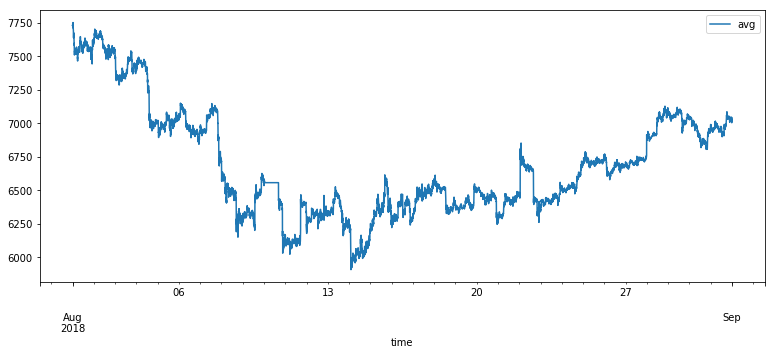

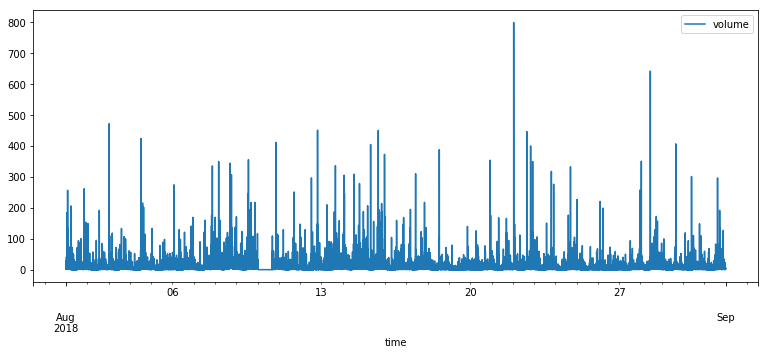

In [5]:
curr_data = load_data('201808')
# curr_data['BTC-USD'].loc['open', 'close', 'high', 'low']
curr_data['BTC-USD'][['avg']].plot(figsize=(13, 5))
curr_data['BTC-USD'][['volume']].plot(figsize=(13, 5))

## Modeling

In [29]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout

from sklearn.externals import joblib
from sklearn.model_selection import train_test_split 

In [71]:
# build model 

def build_model(dims_per_layer):
    loss_func = 'mse'
    optimiser_func = 'Nadam'
    
    rnn_model = Sequential()
    rnn_model.add(LSTM(input_dim=dims_per_layer[0], output_dim=dims_per_layer[1], return_sequences=True))
    rnn_model.add(Dropout(0.1))
    rnn_model.add(LSTM(output_dim=dims_per_layer[2], return_sequences=True))
    rnn_model.add(Dropout(0.1))
    rnn_model.add(Dense(output_dim=dims_per_layer[3]))
    rnn_model.add(Activation('tanh'))
    
    rnn_model.compile(loss=loss_func, optimizer=optimiser_func)
    return rnn_model

def train_model(model_name, train_x, train_y, epoches=100, batch_size=1):
    
    model = build_model([len(train_x.columns), 128, 64, 1])
    model.fit(train_x, train_y, epochs=epoches, batch_size=batch_size, verbose=2)
    
    joblib.dump(model, f'./{model_name}.joblib')
    return model
    

def split_train_xy(df, window_x, window_y, stride=1):
    train_x = []
    train_y = []
    i = 0
    while(i+window_x+window_y < len(df)):
        train_x = train_x.append((df[i:(i+window_x)][['open', 'close', 'high', 'low', 'volume_minmax']]).values)
#         train_y.append(df[(i+window_x):(i+window_x+window_y)][['avg']])
        train_y = train_y.append((df.iloc[(i+window_x+window_y)][['avg']]).values)
        
        i += stride
                
    return train_x, train_y

In [69]:
# train_x = pd.DataFrame()
# train_x = train_x.append(data['LTC-USD'][0:30][['open', 'close', 'high', 'low', 'volume_minmax']])

In [72]:
data = load_data('201808')

# for key, item in data.items():
#      data_x, 
# ltc_data = data['LTC-USD']
data_x, data_y = split_train_xy(data['LTC-USD'], 120, 30)
# x_train, x_val, y_train, y_val = train_test_split(data_x, data_y, test_size=0.3)



KeyboardInterrupt: 

In [ ]:
# ltc_model = train_model('ltc_model', x_train, y_train)